In [1]:
import glob
from typing import Dict
import numpy as np
import pandas as pd
import os

from model_training.cnn_classifier import CNNClassifier
from model_training.architectures.simple_convolution_network import SimpleConvolutionArchitecture

from model_training.measures import summary, get_true_and_predicted_labels

In [4]:
ARCHITRECTURE = SimpleConvolutionArchitecture()
FOLDER_PATH = "../models/simple_CNN_spectrograms_sharpened_cleaned_augmented_syllable"
DATASET = "../data/tsrc_spectrograms_sharpened_cleaned_augmented_syllable"
CLASS_LABELS = os.listdir(f"{DATASET}/train")

In [5]:
model = CNNClassifier(FOLDER_PATH, architecture=ARCHITRECTURE)
model.fit(
    f"{DATASET}/train", 
    f"{DATASET}/validation",
    batch_size=32,
    n_epochs=10,
)

Running training on GPU...


 10%|███████▉                                                                       | 1/10 [23:43<3:33:30, 1423.40s/it]

Epoch 0 Done after 1423.4011080265045 seconds


 20%|███████████████▊                                                               | 2/10 [43:06<2:49:21, 1270.23s/it]

Epoch 1 Done after 1163.0044038295746 seconds


 30%|███████████████████████                                                      | 3/10 [1:02:01<2:21:00, 1208.66s/it]

Epoch 2 Done after 1135.3841013908386 seconds


 40%|██████████████████████████████▊                                              | 4/10 [1:21:25<1:59:05, 1190.84s/it]

Epoch 3 Done after 1163.5310122966766 seconds


 50%|██████████████████████████████████████▌                                      | 5/10 [1:40:57<1:38:40, 1184.20s/it]

Epoch 4 Done after 1172.3940591812134 seconds


 60%|██████████████████████████████████████████████▏                              | 6/10 [2:00:05<1:18:06, 1171.65s/it]

Epoch 5 Done after 1147.2810533046722 seconds


 70%|███████████████████████████████████████████████████████▎                       | 7/10 [2:19:58<58:56, 1178.93s/it]

Epoch 6 Done after 1193.9165205955505 seconds


 80%|███████████████████████████████████████████████████████████████▏               | 8/10 [2:39:35<39:16, 1178.10s/it]

Epoch 7 Done after 1176.3144721984863 seconds


 90%|███████████████████████████████████████████████████████████████████████        | 9/10 [2:59:59<19:52, 1192.68s/it]

Epoch 8 Done after 1224.7297196388245 seconds


100%|██████████████████████████████████████████████████████████████████████████████| 10/10 [3:15:59<00:00, 1175.96s/it]

Epoch 9 Done after 959.590756893158 seconds
Finished Training


In [6]:
y_true, y_pred = get_true_and_predicted_labels(model, f"{DATASET}/test")

In [7]:
df = pd.DataFrame({'y_true' : y_true, "y_pred" : y_pred })
df.to_csv(f"{FOLDER_PATH}/predictions.csv", index=False)

Accuracy: 0.843029976111582
Micro F1 Score: 0.843029976111582
Macro F1 Score: 0.8435669324529088
Weighted F1 Score: 0.8433371016507071


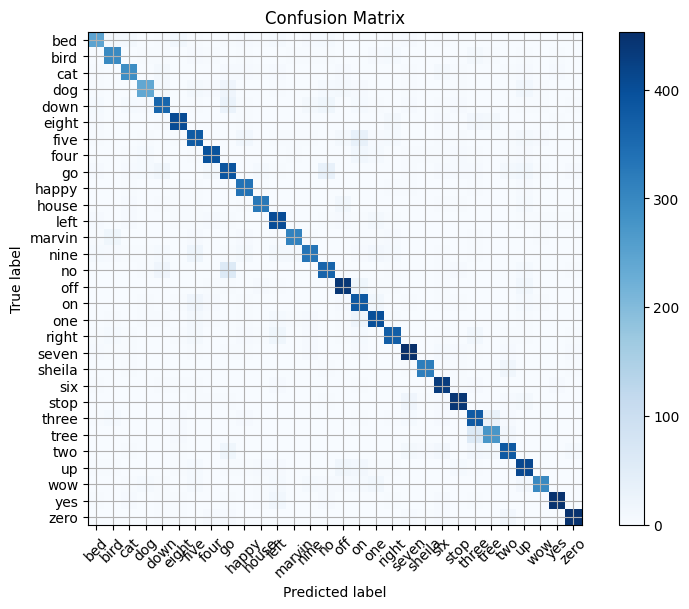

In [8]:
df = pd.read_csv(f"{FOLDER_PATH}/predictions.csv")
y_true = df["y_true"].values
y_pred = df["y_pred"].values
summary = summary(y_true, y_pred, CLASS_LABELS)